# **AI For Developer Productivity Office Hours 4/23/24**

**LangChain Agent Overview:**
  - LangChain agents are designed to mimic intelligent entities that perceive their environment, make decisions to achieve specific goals, and learn over time. These agents primarily use Large Language Models (LLMs) to reason and determine the best approaches to fulfill user requests.
  
**Functionality and Tools:**
  - To interact with and operate within their environment, LangChain agents use a set of tools called "Tools." These tools are essentially methods or classes that allow the agent to perform actions like querying a database, updating a calendar event, or interacting with a stock market index through an API.

**Toolkits:**
  - A Toolkit in LangChain is a collection of various Tools that an agent can access to execute tasks. These toolkits are structured as arrays containing the tools available for the agent's use, facilitating the agent's interaction with its environment and task execution.

# Today's lesson aims to:

1. Develop a basic agent that can perform mathematical calculations faster than a typical Large Language Model (LLM).
2. Demonstrate how to create and implement tools that enhance the agent's capabilities.
3. Illustrate the use of a toolkit to effectively employ these tools in practical scenarios.

Import packages

In [ ]:
%pip install langchain

In [ ]:
%pip install langchain_openai

In [ ]:
%pip install matplotlib numpy

In [ ]:
import os

from langchain.agents import AgentExecutor, create_openai_tools_agent
from langchain_openai import ChatOpenAI

from langchain.tools import BaseTool, StructuredTool, tool
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

Set OpenAI API Key

In [ ]:
# Make sure to update this with your OpenAI API Key
os.environ["OPENAI_API_KEY"] = "sk-"

Imports for tooling

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Create tools

In [ ]:
@tool
def add(a: int, b: int) -> int:
    """Add two numbers."""
    return a + b


@tool
def multiply(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b


@tool
def square(a) -> int:
    """Calculates the square of a number."""
    a = int(a)
    return a * a

@tool
def findAreaOfCircle(r: int) -> float:
  """Find the area of a circle using it's radius"""
  a = 3.14 * r ** 2
  return a

@tool
def display_circle(radius: int):
    """
    Displays a circle with the given radius using matplotlib.

    Args:
        radius (int): The radius of the circle to display.
    """
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Create a circle using the given radius
    circle = plt.Circle((0, 0), radius, fill=False, color='r', linewidth=2)

    # Add the circle to the axis
    ax.add_artist(circle)

    # Set the aspect ratio to be equal
    ax.set_aspect('equal')

    # Set the axis limits to show the entire circle
    ax.set_xlim((-radius - 1, radius + 1))
    ax.set_ylim((-radius - 1, radius + 1))

    # Remove the axis ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])

    # Display the circle
    plt.show()

Create prompt

In [ ]:
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", """You are a mathematical assistant. Use your tools to answer questions.
         If you do not have a tool to answer the question, say so.

        Return only the answers. e.g
        Human: What is 1 + 1?
        AI: 2
        """),
        MessagesPlaceholder("chat_history", optional=True),
        ("human", "{input}"),
        MessagesPlaceholder("agent_scratchpad"),
    ]
)

Creat agent and execute

In [ ]:
# Choose the LLM that will drive the agent
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)

# Setup the toolkit
toolkit = [add, multiply, square, display_circle, findAreaOfCircle]

# Construct the OpenAI Tools agent
agent = create_openai_tools_agent(llm, toolkit, prompt)

# Create an agent executor by passing in the agent and toolkit
agent_executor = AgentExecutor(agent=agent, tools=toolkit, verbose=True)

Give prompt



> Entering new AgentExecutor chain...

Invoking: `display_circle` with `{'radius': 7}`




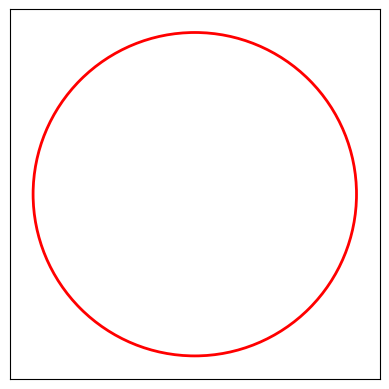

NoneI have displayed a circle with a radius of 7.

> Finished chain.
I have displayed a circle with a radius of 7.


In [ ]:
result = agent_executor.invoke({"input": "Display a circle radius of 7."})
print(result['output'])